In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr
import sys  

sys.path.insert(1, '../')
from optimalEmbedding_sampling import run_optEmbedding_sampling
from GCCM_sampling import run_GCCM_sampling

sys.path.insert(1, '../scripts')
from nobound_diffusionMean import run_versions_
from diffusion import remove_linear_signals, run_sim, show_patterns
from grid_diffusionMean import run_grid
from plot import get_mean, get_interval, make_Eplot, make_Lplot

from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec

sys.path.insert(1, '.')

%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [4]:
# Set specific font sizes
plt.rcParams.update({
    'font.size': 12,          # Global font size
    'axes.titlesize': 10,     # Title font size
    'axes.labelsize': 10,     # X and Y axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 10,    # Legend font size
})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [5]:
size=100
np.random.seed(seed=10)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

In [6]:
dims = np.arange(1,9)
lib_sizes = np.arange(10,101,30)

In [7]:
c_list = [0,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 
     0.11, 0.12, 0.13, 0.14]
a1 = np.linspace(2.8e-3, 2.8e-5,15)
a2 = np.flip(a1)
a_list = np.dstack((a1,a2)).squeeze() #np.array(zip(a1,a2))
a_ratio = a1/a2

In [34]:
for a, r in zip(a_list, a_ratio):
    print(a, 'ratio ',r )

[2.8e-03 2.8e-05] ratio  100.0
[0.002602 0.000226] ratio  11.513274336283205
[0.002404 0.000424] ratio  5.669811320754718
[0.002206 0.000622] ratio  3.5466237942122203
[0.002008 0.00082 ] ratio  2.448780487804878
[0.00181  0.001018] ratio  1.7779960707269158
[0.001612 0.001216] ratio  1.3256578947368423
[0.001414 0.001414] ratio  1.0
[0.001216 0.001612] ratio  0.7543424317617865
[0.001018 0.00181 ] ratio  0.5624309392265192
[0.00082  0.002008] ratio  0.40836653386454186
[0.000622 0.002206] ratio  0.2819582955575701
[0.000424 0.002404] ratio  0.17637271214642258
[0.000226 0.002602] ratio  0.08685626441199064
[2.8e-05 2.8e-03] ratio  0.01


# Visualize bounds 1, 0.01, 10

In [ ]:
sample=50
c=0.1
a1 = 2.800e-04
a2 = 2.800e-04   

results_diffsame = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

In [14]:
with open('../diffusion_results_paper/plot/mean50_c01_t30_diff1.pkl', 'rb') as pickle_file:
    results_diffsame = pickle.load(pickle_file)

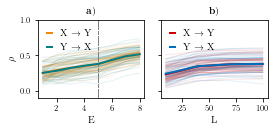

In [16]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diffsame.keys():
    result_L = results_diffsame[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,       frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots_paper/mean_c01_1.pdf', bbox_inches='tight')

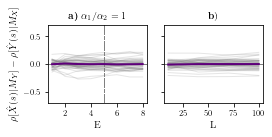

In [17]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diffsame.keys():
    result_E = results_diffsame[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.7,0.7)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=1$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diffsame.keys():
    result_L = results_diffsame[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))

for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots_paper/diff_c01_1.pdf', bbox_inches='tight')

In [ ]:
sample=50
c=0.1
a1 = 2.800e-04
a2 = 2.800e-03   

results_diff01 = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

In [18]:
with open('../diffusion_results_paper/plot/mean50_c01_t30_diff01.pkl', 'rb') as pickle_file:
    results_diff01 = pickle.load(pickle_file)

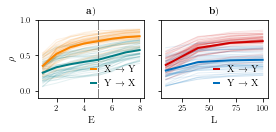

In [19]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff01.keys():
    result_L = results_diff01[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots_paper/mean_c01_1.pdf', bbox_inches='tight')

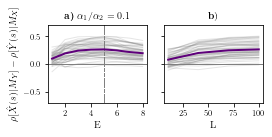

In [20]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff01.keys():
    result_E = results_diff01[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.7,0.7)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=0.1$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff01.keys():
    result_L = results_diff01[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))


for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots_paper/diff_c01_1.pdf', bbox_inches='tight')

In [ ]:
sample=50
c=0.1
a1 = 2.800e-03
a2 = 2.800e-04   

results_diff10 = run_versions_(a1=a1, a2=a2, c=c, sample=sample)

In [21]:
with open('../diffusion_results_paper/plot/mean50_c01_t30_diff10.pkl', 'rb') as pickle_file:
    results_diff10 = pickle.load(pickle_file)

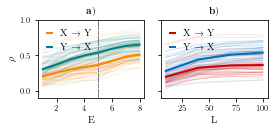

In [22]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ex_xmap_y = []
Ey_xmap_x = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ex_xmap_y.append(x_xmap_y)
    Ey_xmap_x.append(y_xmap_x)
    
    ax[0].plot(dims, y_xmap_x,  c='#FB8500', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].plot(dims, x_xmap_y,  c='#017D84', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[0].fill_between(dims, xy_l, xy_u, color='#017D84', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

p3,=ax[0].plot(dims, np.array(Ey_xmap_x).mean(axis=0),  c='#FB8500', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[0].plot(dims, np.array(Ex_xmap_y).mean(axis=0),  c='#017D84', lw=2, label = r'Y $\rightarrow$ X')


ax[0].set_ylim(-0.1,1)
ax[0].set_title(r'$\textbf a)$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,     frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Lx_xmap_y = []
Ly_xmap_x = []

for k in results_diff10.keys():
    result_L = results_diff10[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Lx_xmap_y.append(x_xmap_y)
    Ly_xmap_x.append(y_xmap_x)
    
    ax[1].plot(lib_sizes, y_xmap_x,  c='#D00000', lw=1, label = r'X $\rightarrow$ Y', alpha=0.1)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)
    ax[1].plot(lib_sizes, x_xmap_y,  c='#006EBC', lw=1, label = r'Y $\rightarrow$ X', alpha=0.1)
    #ax[1].fill_between(lib_sizes, xy_l, xy_u, color='#006EBC', alpha=0.1, lw=0)

p3,=ax[1].plot(lib_sizes, np.array(Ly_xmap_x).mean(axis=0),  c='#D00000', lw=2, label = r'X $\rightarrow$ Y')
p4,=ax[1].plot(lib_sizes, np.array(Lx_xmap_y).mean(axis=0),  c='#006EBC', lw=2, label = r'Y $\rightarrow$ X')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
legend = ax[1].legend([p3, p4], [r'X $\rightarrow$ Y', r'Y $\rightarrow$ X'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
               handlelength=0.5,      frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots_paper/mean_c01_100.pdf', bbox_inches='tight')

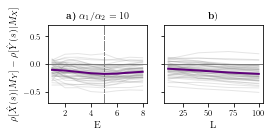

In [23]:
fig, ax = plt.subplots(1,2, figsize=(4,2), sharey=True)

Ediff = []
for k in results_diff10.keys():
    result_E = results_diff10[k]['optE']
    
    x_xmap_y, y_xmap_x = get_mean(result_E, dims)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_E, dims)

    Ediff.append(y_xmap_x-x_xmap_y)
    
    ax[0].plot(dims, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[0].fill_between(dims, yx_l, yx_u, color='#FB8500', alpha=0.1, lw=0)
    ax[0].axvline(x=5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[0].axhline(y=0, color='gray', linewidth=1)
p3,=ax[0].plot(dims, np.array(Ediff).mean(axis=0),  c='#5e007a', lw=2)

ax[0].set_ylim(-0.7,0.7)
ax[0].set_title(r'$\textbf{a)}$ $\alpha_1/\alpha_2=10$')
ax[0].set_xlabel('E')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
ax[0].set_ylabel(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10)
#legend = ax[0].legend([p3], [r'$\rho[\hat{Y}(s)|M_X] - \rho[\hat{X}(s)|M_Y]$'], scatterpoints=1,
#               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)},
#                    frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

Ldiff = []
for k in results_diff10.keys():
    result_L = results_diff10[k]['convergence']

    x_xmap_y, y_xmap_x = get_mean(result_L, lib_sizes)
    xy_u, xy_l, yx_u, yx_l = get_interval(result_L, lib_sizes)

    Ldiff.append(y_xmap_x-x_xmap_y)
    
    ax[1].plot(lib_sizes, y_xmap_x-x_xmap_y,  c='grey', lw=1, label = r'X $\rightarrow$ Y', alpha=0.2)
    #ax[1].fill_between(lib_sizes, yx_l, yx_u, color='#D00000', alpha=0.1, lw=0)

ax[1].axhline(y=0, color='gray', linewidth=1)
p3,=ax[1].plot(lib_sizes, np.array(Ldiff).mean(axis=0),  c='#5e007a', lw=2, label = r'X $\rightarrow$ Y')

ax[1].set_title(r'$\textbf b)$')
ax[1].set_xlabel('L')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))


for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
#plt.savefig('plots_paper/diff_c01_10.pdf', bbox_inches='tight')

## Heatmap

In [8]:
import uuid

In [24]:
with open('../diffusion_results_paper/results.pkl', 'rb') as pickle_file:
    results = pickle.load(pickle_file)

In [10]:
diff_map = {}

for i in results['results_map'].keys():
    c = results['meta'][i][2]
    a1 = results['meta'][i][3]
    a2 = results['meta'][i][4]
    
    sample = results['results_map'][i]
    diff = []
    for k in sample.keys():
        result_L = sample[k]['gccm']
        x_xmap_y, y_xmap_x = get_mean(result_L, [100])
        diff.append(y_xmap_x-x_xmap_y)
    diff_map[i] = np.array(diff).mean()

    print(c, a1/a2, np.array(diff).mean())

0 100.0 -0.14994380527925594
0 11.513274336283205 -0.18214304096062495
0 5.669811320754718 -0.13627455429076615
0 3.5466237942122203 -0.1015742794751782
0 2.448780487804878 -0.06858229946204202
0 1.7779960707269158 -0.04046370354881726
0 1.3256578947368423 -0.01670196128115752
0 1.0 0.014790825173649512
0 0.7543424317617865 0.04097934365133311
0 0.5624309392265192 0.062026704583195216
0 0.40836653386454186 0.08301674068874877
0 0.2819582955575701 0.09794102578982318
0 0.17637271214642258 0.13771978356052925
0 0.08685626441199064 0.18286914671481846
0 0.01 0.17518819931385418
0.01 100.0 -0.1513583932593933
0.01 11.513274336283205 -0.18870803784109633
0.01 5.669811320754718 -0.13542091265186154
0.01 3.5466237942122203 -0.10716317184006138
0.01 2.448780487804878 -0.06966355811913516
0.01 1.7779960707269158 -0.04441025256104388
0.01 1.3256578947368423 -0.01221568644748311
0.01 1.0 0.01202134417948867
0.01 0.7543424317617865 0.034156967043156745
0.01 0.5624309392265192 0.06119878127138463
0

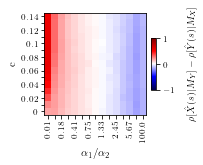

In [83]:
fig, ax = plt.subplots(1,1, figsize=(2,2))
p = plt.imshow(np.array(list(diff_map.values())).reshape(len(c_list), a_list.shape[0]), 
               cmap='seismic', vmin=-1, vmax=1, origin='lower')
ax.invert_xaxis()

ax.set_xticks(np.arange(a_ratio.shape[0]))     
ax.set_yticks(np.arange(len(c_list)))  
# Only show every second label for the x-axis
ax.set_xticklabels([label if idx % 2 == 0 else '' for idx, label in enumerate(a_ratio.round(2))])
plt.setp(ax.get_xticklabels(), rotation=90)

# Only show every second label for the y-axis
ax.set_yticklabels([label if idx % 2 == 0 else '' for idx, label in enumerate(c_list)])

ax.set_xlabel(r'$\alpha_1/\alpha_2$')
ax.set_ylabel(r'c')

cbar = fig.colorbar(p, fraction=0.046, pad=0.04, aspect=10)
cbar.set_label(r'$ \rho[\hat{X}(s)|M_Y] - \rho[\hat{Y}(s)|M_X]$', fontsize=10, labelpad=10)

plt.savefig('plots_paper/heatmap.pdf', bbox_inches='tight')